In [1]:
import pandas as pd


path_in="/home/noura369/Documents/Basic_NOURA2/ABC/kc_house_data.csv"
df =pd.read_csv(path_in)

In [2]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [15]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
#Importing libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [27]:
df_train=df.copy()

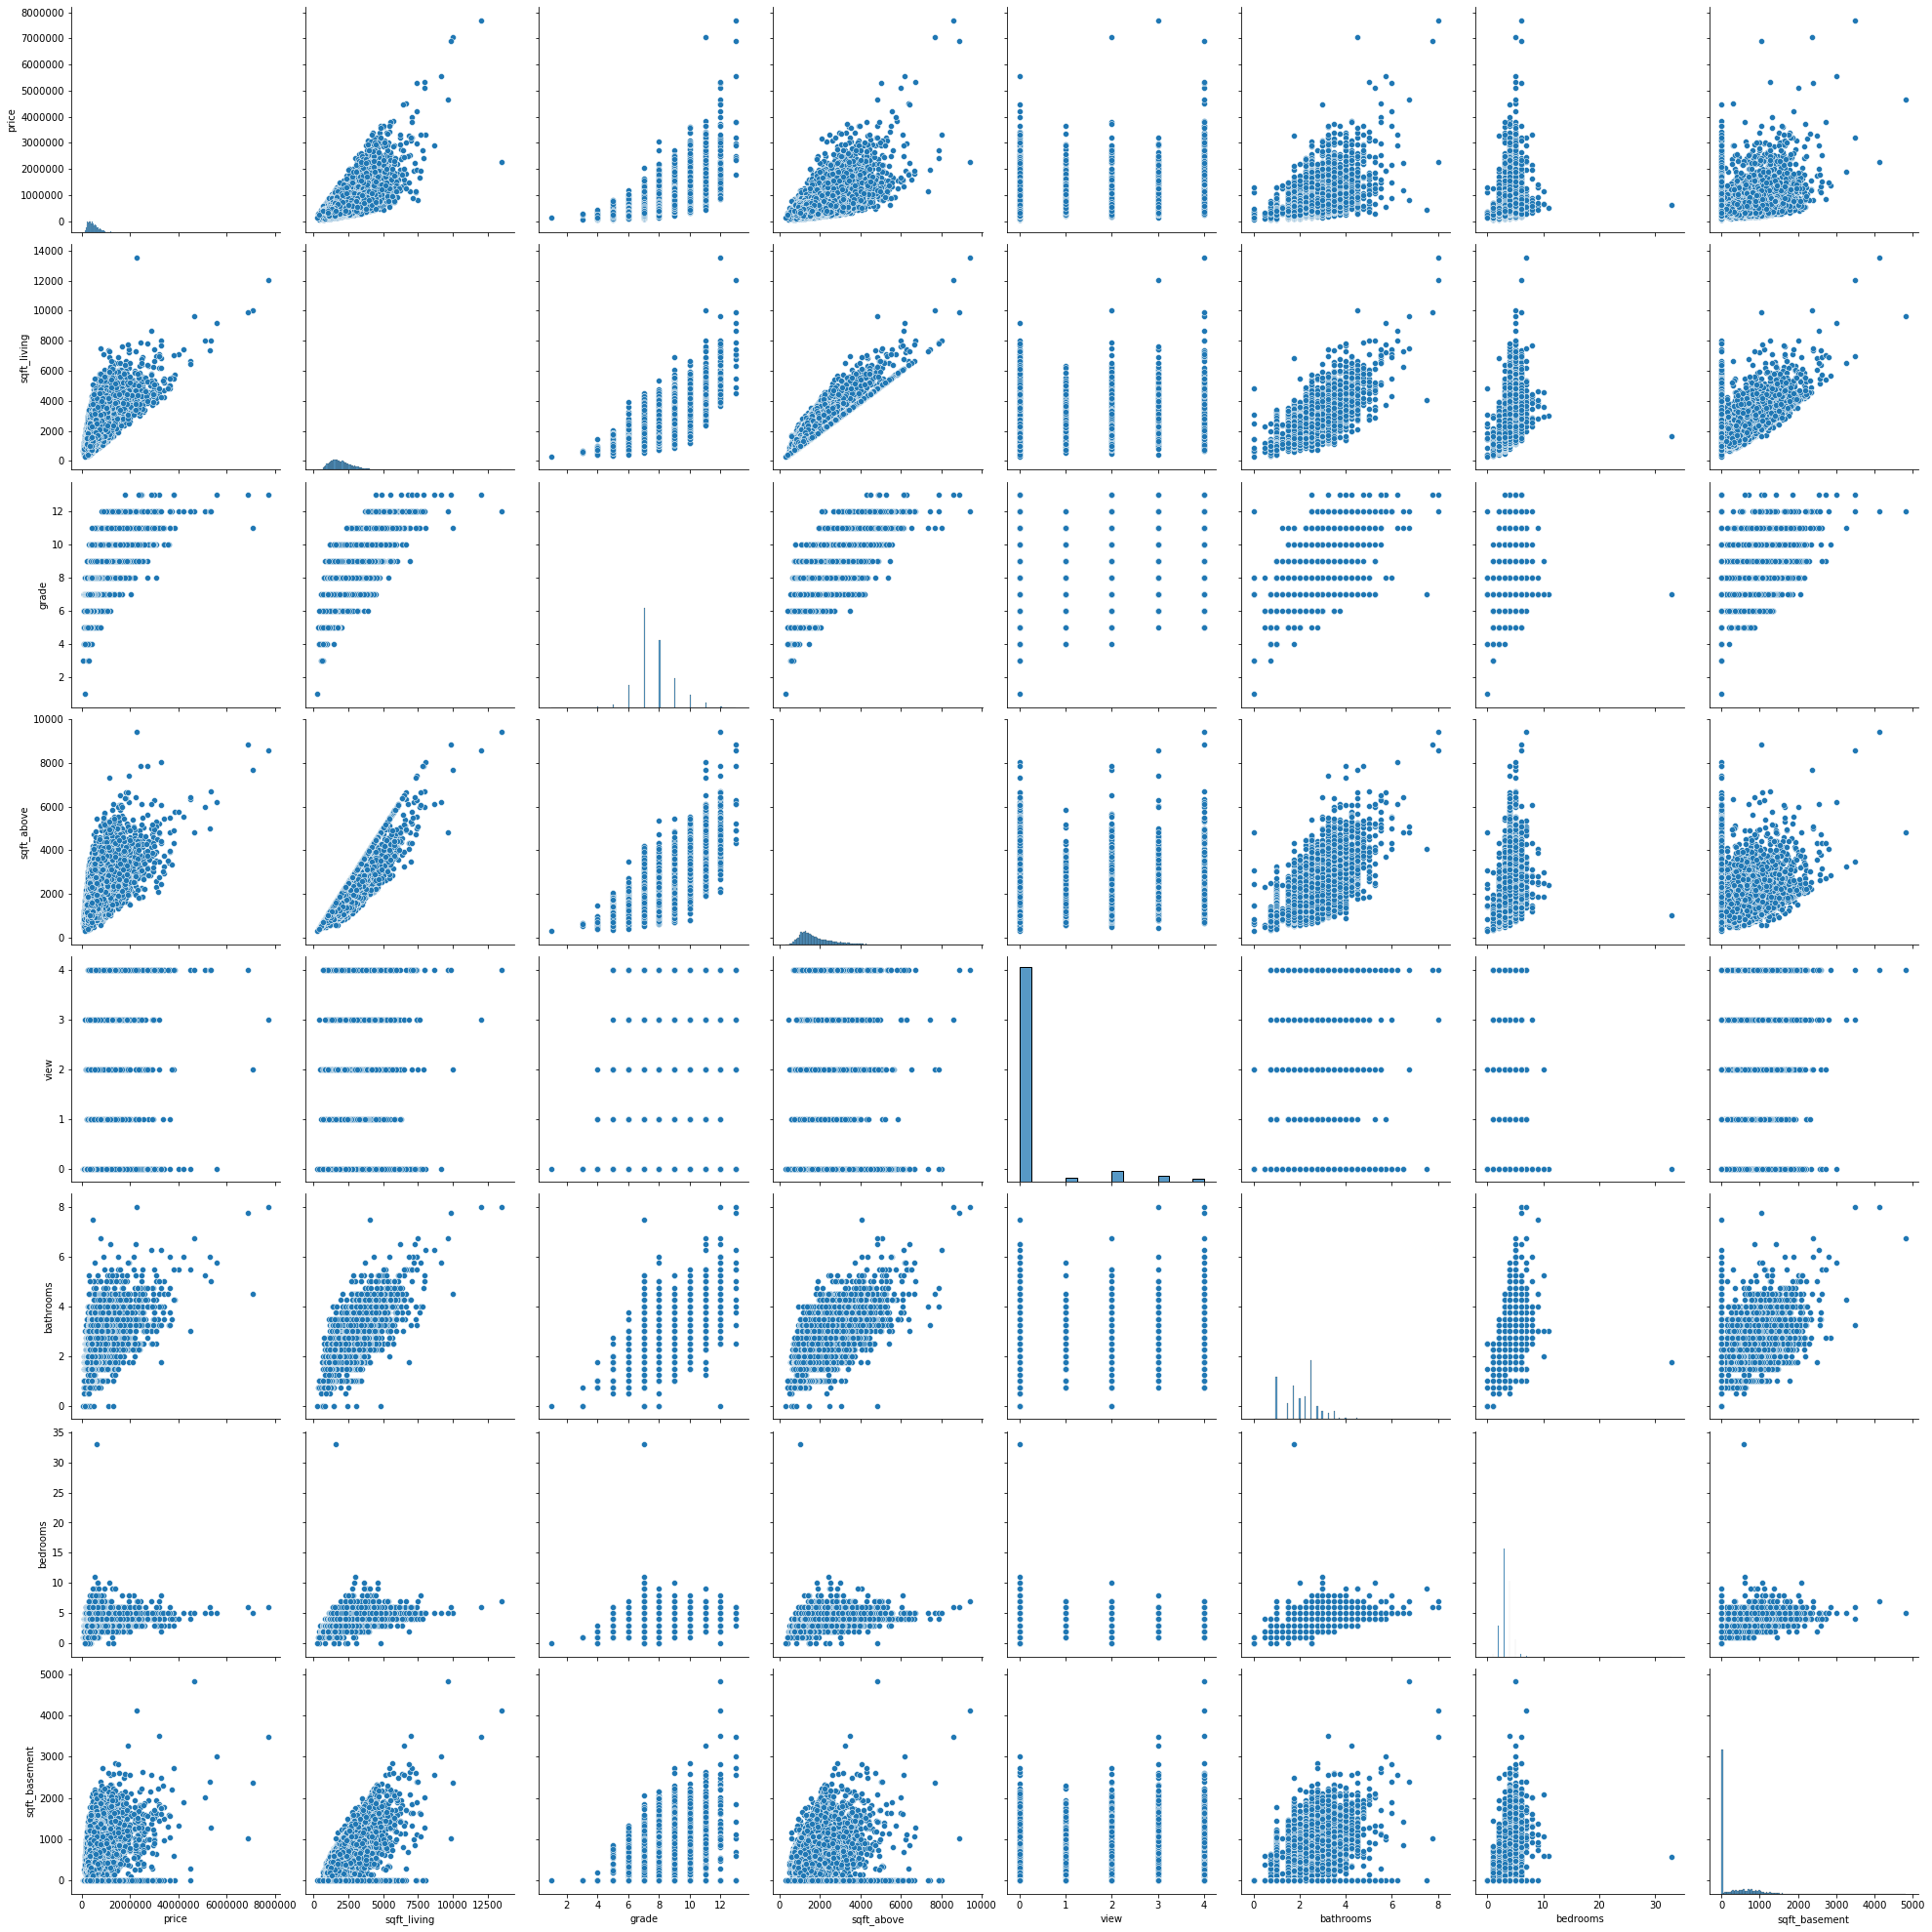

In [30]:
#I usedPairplots to visualize correlation:
import seaborn as sns
import matplotlib.pyplot as plt
cols = ['price', 'sqft_living', 'grade', 'sqft_above', 'view', 'bathrooms','bedrooms','sqft_basement']
sns.pairplot(df_train[cols], height = 3.5)
plt.show()

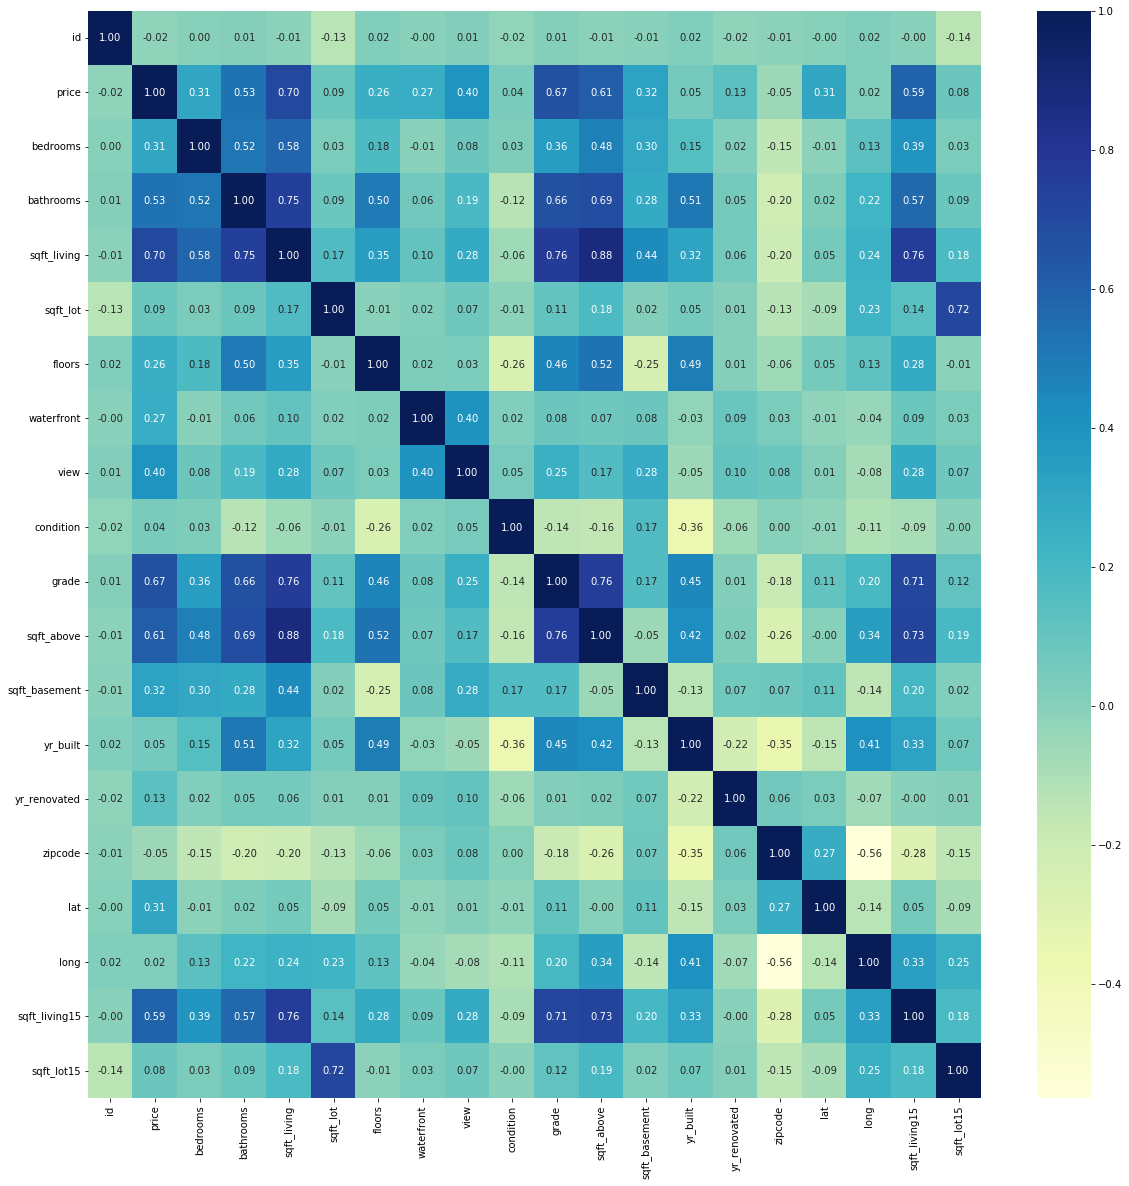

In [37]:
plt.subplots(figsize=(20, 20))
sns.heatmap(df.corr(), cmap = "YlGnBu", annot=True, fmt=".2f")
plt.show()

In [38]:
#extract x and y from our data
x=df[["sqft_living"]]
y=df["price"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

In [39]:
model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

In [40]:
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 62902408306.86497
R squared 0.49965284883874206


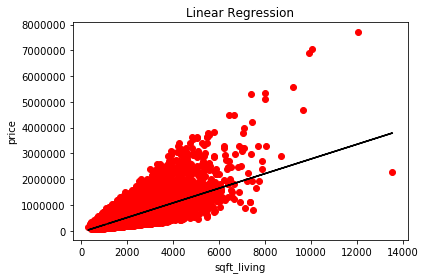

In [41]:
plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel("sqft_living")
plt.plot(x,model.predict(x),color="k")
plt.show()

In [56]:
#extract x and y from our data
x=df[["sqft_living","sqft_basement","sqft_above",'view', 'bathrooms','bedrooms']]  #we have more than one input
y=df["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

model=LinearRegression() #build linear regression model
model.fit(x_train,y_train) #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 57221169907.83795
R squared 0.5448433514686848


In [63]:
#In Linear Reg. I got:
#MSE 62902408306.86497
#R squared 0.49965284883874206
#In Multilinear Regression I got:
#MSE 57221169907.83795
#R squared  0.5448433514686848


In [57]:
# Applying the libraries;
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 

In [58]:
# Import the models;
lg = LinearRegression() 
poly = PolynomialFeatures(degree = 2) 

In [59]:
# Appling the fit transform 
x_=poly.fit_transform(x)

In [60]:
print("x before transformation: ", x)
print("x after transformation: ", x_)

lg.fit(x_, y) # Fitting Polynomial Regression to the dataset 

x before transformation:         sqft_living  sqft_basement  sqft_above  view  bathrooms  bedrooms
0             1180              0        1180     0       1.00         3
1             2570            400        2170     0       2.25         3
2              770              0         770     0       1.00         2
3             1960            910        1050     0       3.00         4
4             1680              0        1680     0       2.00         3
...            ...            ...         ...   ...        ...       ...
21608         1530              0        1530     0       2.50         3
21609         2310              0        2310     0       2.50         4
21610         1020              0        1020     0       0.75         2
21611         1600              0        1600     0       2.50         3
21612         1020              0        1020     0       0.75         2

[21613 rows x 6 columns]
x after transformation:  [[1.0000e+00 1.1800e+03 0.0000e+00 ... 1.0000e+

LinearRegression()

In [64]:
predicted=model.predict(x_test) #testing our model’s performance

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 57221169907.83795
R squared 0.5448433514686848


In [65]:
#In Linear Reg. I got:
#MSE 62902408306.86497
#R squared 0.49965284883874206
#In Multilinear Regression I got:
#MSE 57221169907.83795
#R squared  0.5448433514686848 
#*I think it is the best model
# In polynomial Regression;
#MSE 62843801090.41397
#R squared 0.5001190305729246

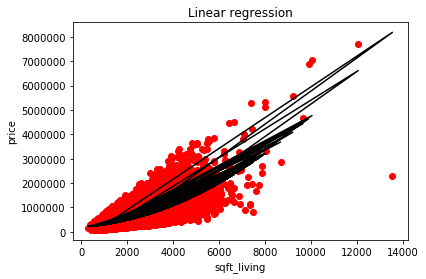

In [66]:
x= df["sqft_living"].values.reshape(-1,1)
y= df["price"].values
poly = PolynomialFeatures(degree = 2) 
x_poly = poly.fit_transform(x) 
poly.fit(x_poly, y) 
lg=LinearRegression()
lg.fit(x_poly, y) 

plt.scatter(x, y, color="r")
plt.title("Linear regression")
plt.ylabel("price")
plt.xlabel("sqft_living")
plt.plot(x, lg.predict(poly.fit_transform(x)), color="k") 